# **Ejemplo 2_4:** Determinación de observaciones influyentes: método de jackknife

24_25

---



**PROBLEMA**: Queremos averiguar si existe algún dato  influyente para los procedimientos estadísticos de calcular la **media** y la **mediana**.
> Vamos a generar una muestra simulando los ingresos de un barrio/población. Supongamos que hay un vecino con unos ingresos signficativamente altos.



In [ ]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import scipy.stats as st
# Generación de datos
# ==============================================================================
# Generamos (100 elementos) ingresos uniformemente distribuidos en [15000,25000]
datos = 15000+np.random.rand(100)*10000
datos_ord = datos
datos_ord.sort()
datos

array([15252.54701847, 15273.38614939, 15306.71257564, 15311.71429462,
       15440.65097606, 15596.10972788, 15640.06861176, 15799.33154584,
       15874.56938737, 15882.30051683, 16191.15547981, 16334.06936221,
       16374.37383897, 16419.49513398, 16790.77335209, 16873.48103249,
       16988.80754042, 17097.00502764, 17178.72049008, 17191.69064222,
       17394.12783725, 17515.25172194, 17699.48472255, 17776.0491325 ,
       18450.41136119, 18453.02350618, 18457.24291367, 18528.93390447,
       18552.31834924, 18616.86590444, 18715.99231962, 18716.62449528,
       18757.20898221, 18774.69880322, 18957.81534692, 18972.85211376,
       18977.90957583, 19177.33738812, 19223.121303  , 19365.04161239,
       19392.81989788, 19461.7915587 , 19467.20126867, 19528.1450811 ,
       19640.68082405, 19678.15269608, 19709.39644172, 19793.18192215,
       20088.17374803, 20514.26981806, 20700.5895222 , 20952.4089001 ,
       21204.68700378, 21206.25126856, 21433.27553223, 21738.31817603,
      

**Ejercicio**: Calcular la media y la mediana antes de realizar la modificación de incluir unos ingresos de 500.000€

In [ ]:
#Calcular la media y la mediana antes de realizar la modificación de
#incluir unos ingresos de 500.000€
media=  np.mean(datos)
mediana=  np.median (datos) # Es el valor central cuando los datos se ordenan
print(f" Media= {media} y Mediana={mediana}")

 Media= 20483.658932003003 y Mediana=20607.42967012899


In [ ]:
# Simulamos (porque se lo asignamos en la siguiente línea) que el vecino 50 tiene unos ingresos significativamente mayores que el resto
datos[50]=500000
datos

array([ 15252.54701847,  15273.38614939,  15306.71257564,  15311.71429462,
        15440.65097606,  15596.10972788,  15640.06861176,  15799.33154584,
        15874.56938737,  15882.30051683,  16191.15547981,  16334.06936221,
        16374.37383897,  16419.49513398,  16790.77335209,  16873.48103249,
        16988.80754042,  17097.00502764,  17178.72049008,  17191.69064222,
        17394.12783725,  17515.25172194,  17699.48472255,  17776.0491325 ,
        18450.41136119,  18453.02350618,  18457.24291367,  18528.93390447,
        18552.31834924,  18616.86590444,  18715.99231962,  18716.62449528,
        18757.20898221,  18774.69880322,  18957.81534692,  18972.85211376,
        18977.90957583,  19177.33738812,  19223.121303  ,  19365.04161239,
        19392.81989788,  19461.7915587 ,  19467.20126867,  19528.1450811 ,
        19640.68082405,  19678.15269608,  19709.39644172,  19793.18192215,
        20088.17374803,  20514.26981806, 500000.        ,  20952.4089001 ,
        21204.68700378,  

Cálculo de media y mediana en toda la muestra

In [ ]:
media=  np.mean(datos)
mediana=  np.median (datos) # Es el valor central cuando los datos se ordenan
print(f" Media= {media} y Mediana={mediana}")

 Media= 25276.653036781034 y Mediana=20733.339359078283


Notar que los ingresos del barrio son aprox. 20000 euros (Mediana). El hecho que se haya trasladado un vecino rico ha incrementando aprox. en 5000 euros la media. La mediana es insensible a este hecho. Se trata de identificar que datos son influyentess para los dos procedimientos estadísticos

Ejercicio: Aplicar el método de describe para ver un resumen estadístico de los datos.

In [ ]:
# Insertar el código aquí
pd.DataFrame(datos).describe()

,0
count,100.000000
mean,25276.653037
std,48046.307937
min,15252.547018
25%,18452.370470
50%,20733.339359
75%,23256.163450
max,500000.000000


**Ejercicio**: Aplicar el método de Probabilidad global, para detectar los outliers utilizado en el ejemplo 2_3_Outliers

In [ ]:
import numpy as np
import scipy.stats as st

# Suponiendo que 'datos' es la lista de valores que se quiere analizar:
#datos = [valor1, valor2, ..., valorN]  # Reemplaza con tus datos específicos

# Definimos la Probabilidad Global
p_g = 0.95

# Calcular alfa_g y ajustar alfa considerando el tamaño del conjunto de datos
alfa_g = (1 - p_g) / 2
N = len(datos)
alfa = 1 - (1 - alfa_g)**(1 / N)

# Obtener el valor crítico Z_alfa de la distribución normal estándar
Z_alfa = st.norm.ppf(1 - alfa / 2)

# Calcular la media y desviación estándar de los datos
media = np.mean(datos)
desviacion_estandar = np.std(datos)

# Calcular los límites de las bandas
xL = round(media - Z_alfa * desviacion_estandar, 4)
xU = round(media + Z_alfa * desviacion_estandar, 4)

# Mostrar la probabilidad ajustada y los límites
print(f" Alfa ajustado ={alfa}")
print(f" Z_alfa ={Z_alfa}")
print(f" Banda = [ {xL}, {xU} ]")

# Identificar los outliers
outliers = []
for i in range(len(datos)):
    if datos[i] < xL or datos[i] > xU:
        outliers.append((i, datos[i]))
        print(f" El dato[{i}]={datos[i]} es un outlier")

# Resultado final
if outliers:
    print("Outliers detectados:", outliers)
else:
    print("No se detectaron outliers en los datos.")


 Alfa ajustado =0.000253146032977436
 Z_alfa =3.6590559905449362
 Banda = [ -149646.2486, 200199.5547 ]
 El dato[50]=500000.0 es un outlier
Outliers detectados: [(50, 500000.0)]


Repetir el mismo procedimiento de detectar los outliers para la mediana: ¿Qué ocurre?

In [ ]:
import numpy as np
import scipy.stats as st

# Suponiendo que 'datos' es la lista de valores que se quiere analizar:
#datos = [valor1, valor2, ..., valorN]  # Reemplaza con tus datos específicos

# Definimos la Probabilidad Global
p_g = 0.95

# Calcular alfa_g y ajustar alfa considerando el tamaño del conjunto de datos
alfa_g = (1 - p_g) / 2
N = len(datos)
alfa = 1 - (1 - alfa_g)**(1 / N)

# Obtener el valor crítico Z_alfa de la distribución normal estándar
Z_alfa = st.norm.ppf(1 - alfa / 2)

# Calcular la mediana de los datos
mediana = np.median(datos)

# Calcular la desviación estándar de los datos
desviacion_estandar = np.std(datos)

# Calcular los límites de las bandas basados en la mediana y la desviación estándar
xL = round(mediana - Z_alfa * desviacion_estandar, 4)
xU = round(mediana + Z_alfa * desviacion_estandar, 4)

# Mostrar la probabilidad ajustada y los límites
print(f" Alfa ajustado ={alfa}")
print(f" Z_alfa ={Z_alfa}")
print(f" Banda basada en la Mediana y Desviación Estándar = [ {xL}, {xU} ]")

# Identificar los outliers usando la Mediana y la Desviación Estándar
outliers = []
for i in range(len(datos)):
    if datos[i] < xL or datos[i] > xU:
        outliers.append((i, datos[i]))
        print(f" El dato[{i}]={datos[i]} es un outlier basado en la Mediana y Desviación Estándar")

# Resultado final
if outliers:
    print("Outliers detectados usando la Mediana y Desviación Estándar:", outliers)
else:
    print("No se detectaron outliers usando la Mediana y Desviación Estándar.")


 Alfa ajustado =0.000253146032977436
 Z_alfa =3.6590559905449362
 Banda basada en la Mediana y Desviación Estándar = [ -154189.5623, 195656.241 ]
 El dato[50]=500000.0 es un outlier basado en la Mediana y Desviación Estándar
Outliers detectados usando la Mediana y Desviación Estándar: [(50, 500000.0)]


In [ ]:
#Aplicar el método de Probabilidad global, para detectar los outliers
#utilizado en el ejemplo 2_3_Outliers

# Insertar el código aquí
# CRITERIO 1: PROBABILIDAD GLOBAL - Explicado en el capítulo 5 - Preprocesamiento (Semana 2), en la pág 10
# Asumiendo que las variables tiene una distribución normal.
# Probabilidad de la muestra de estar dentro de las bandas
p_g=0.95
# probabilidad global
alfa_g=(1-p_g)/2
# probabilidad  para un solo dato
alfa= 1-(1-alfa_g)**(1/len(datos)) # Se realiza este ajuste para ser más precisos.
#alfa = alfa_g # Si no realiza la corrección de la línea anterior entonces hubiese detectado más valores que son outliers cuando realmente no lo son. Descomentar esta línea para ver el resultado, que es el mismo que el obtenidoi con el método 2 de este código.
                # con esta corrección lo que se pretende es obtener bandas lo sificientemente anchas.
## CRITERIO 2:  Criterio Chauvenet
# El uso del Criterio de Chauvenet es controvertido en algunas áreas de la estadística, ya que puede llevar a descartar datos válidos,
# especialmente en conjuntos de datos pequeños o en situaciones donde los datos no siguen una distribución normal.
# Por lo tanto, debe usarse con precaución y teniendo en cuenta el contexto específico de los datos analizados.

#alfa=1/(2*len(datos))
Z_alfa=st.norm.ppf(1-alfa/2)
# Impresión de resultados
alfa=round(alfa,5)
Z_alfa=round(Z_alfa,5)
print(f" Alfa ={alfa}")
print(f" Z_alfa ={Z_alfa}")
# Utilizaremos el Criterio 1 ó el Criuterio 2 para calcular alfa y Z-alfa en función de la naturaleza de los datos que estamos procesando.
xL=  round(np.mean(datos)-Z_alfa*  np.std(datos),4)
xU=  round(np.mean(datos)+Z_alfa*  np.std(datos),4)
print(f" Banda= [ {xL},{xU}]")

for i in  range(len(datos)):
        if datos[i] < xL  or datos[i]>xU:
          print(f" El dato[{i}]={datos[i]} es un outlier")

 Alfa =0.00025
 Z_alfa =3.65906
 Banda= [ -149646.4403,200199.7463]
 El dato[50]=500000.0 es un outlier


In [ ]:
!pip install skimpy
from skimpy import skim



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.8/28.8 MB 40.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.1 MB/s eta 0:00:00
  Attempting uninstall: typeguard
    Found existing installation: typeguard 4.4.1
    Uninstalling typeguard-4.4.1:
      Successfully uninstalled typeguard-4.4.1
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 17.0.0
    Uninstalling pyarrow-17.0.0:
      Successfully uninstalled pyarrow-17.0.0
  Attempting uninstall: polars
    Found existing installation: polars 1.9.0
    Uninstalling polars-1.9.0:
      Successfully uninstalled polars-1.9.0
  Attempting uninstall: ipykernel
    Found existing installation: ipykernel 5.5.6
    Uninstalling ipykernel-5.5.6:
      Successfully uninstalled ipykernel-5.5.6
ERROR: pip's dependency resolver does not curr

In [ ]:
data =pd.DataFrame(datos)
data.describe()
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 100    │ │ float64     │ 1     │                                                          │
│ │ Number of columns │ 1      │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0      ┃ p25    ┃ p50    ┃ p75    ┃ p100    ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━┩  │
│ │              0 │   0 │      0 │   25280 │   48050 │   15250 │  18450 │  20730 │  23260 │  500000 │    ▇    │  │
│ └────────────────┴─────┴────────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Otra forma de detactar los outliers

**Método :**  Detectemos los outlier de phi medinate el método Jackknife y a continuación aplicamos el método de la distancia entre Quartiles

In [ ]:
phi=np.zeros(len(datos)) # phi es un array de la misma longitud que datos pero con el valor cero en cada una de sus posiciones
# En el bucle lo que se realiza es el método Jackknife, es decir, prepara los datos para realizar un análisis estadístico sin el dato i.
# Para ello, calcula la media de todos los elementos excluyendo el elemento de la posición i que está procesando en el bucle.
# De forma que obtiene un índice de calidad del modelo para cada uno de los elementos
for i in  range(len(datos)):
  datos_aux=datos
  datos_sin_i=np.delete(datos_aux, i)
  phi[i]=np.mean(datos_sin_i)
phi

array([25377.90663293, 25377.69613665, 25377.35950609, 25377.30898367,
       25376.00659295, 25374.43630253, 25373.9922734 , 25372.38355689,
       25371.62357869, 25371.54548648, 25368.42573938, 25366.98216481,
       25366.57504888, 25366.11927822, 25362.36899319, 25361.53356208,
       25360.36864786, 25359.27574394, 25358.45033523, 25358.31932359,
       25356.27450344, 25355.05102986, 25353.19009046, 25352.41671258,
       25345.6049729 , 25345.5785876 , 25345.53596732, 25344.8118159 ,
       25344.57560938, 25343.92361388, 25342.92233695, 25342.91595134,
       25342.50600703, 25342.32934217, 25340.47968011, 25340.32779358,
       25340.2767081 , 25338.26228576, 25337.79982197, 25336.36628349,
       25336.08569475, 25335.38901131, 25335.33436777, 25334.71877371,
       25333.58204903, 25333.20354527, 25332.88795188, 25332.0416339 ,
       25329.06191849, 25324.75791778, 20481.46771392, 25320.33227048,
       25317.78400681, 25317.76820616, 25315.47503178, 25312.39379295,
      

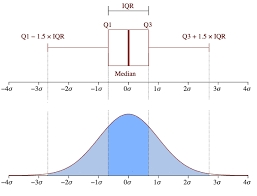

In [ ]:
# Aplicamos el método de la distancia entre cuartiles, en este caso, al aplicar el método Jackknife no obtenemos
# el valor del elemento que es considerado Outlier, sino la posición del mismo.
Q1 = np.quantile(phi,0.25)
Q3 = np.quantile(phi,0.75)
IQR = Q3 - Q1
xL=Q1 - 1.5 * IQR
xU=Q3 + 1.5 * IQR
for i in  range(len(datos)):
        if phi[i] < xL  or phi[i]>xU:
          print(f" El dato {i} es una observación influyente para la media")

 El dato 50 es una observación influyente para la media


In [ ]:
pd.DataFrame(phi).describe()

,0
count,100.000000
mean,25276.653037
std,485.316242
min,20481.467714
25%,25297.062023
50%,25322.545094
75%,25345.585184
max,25377.906633


**Ejercicio**: Repetir el mismo procedimiento (método Jackenife) de detectar los outliers pero con la mediana en lugar de con la media: ¿Qué ocurre? ¿observas variaciones?